In [1]:
import numpy as np
import util as example
from models import funcs
import regression as reg
from optimize.util import optimize

In [2]:
def f(point):
    x, y = point[0], point[1]
    return x ** 2 - x * y + y ** 2 + 9 * x - 6 * y + 20

def grad(point):
    x, y = point[0], point[1]
    return np.array([[2 * x - y + 9], [-x + 2 * y - 6]])

Filename: C:\Workspace\study\sem-4\metopts-labs\lab_3\solution\optimize\lbfgs.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     9 104.4297 MiB 104.4297 MiB           1   @profile(precision=4)
    10                                         def lbfgs(func, grad, generations, start, t=0.5, eps=1e-4, max_iter=100):
    11 104.4297 MiB   0.0000 MiB           1       trace = [start]
    12                                         
    13 104.4297 MiB   0.0000 MiB           1       iters = 0
    14 104.4297 MiB   0.0000 MiB           1       actions = 0
    15                                         
    16 104.4297 MiB   0.0000 MiB           1       start_time = time.time()
    17                                         
    18 104.4297 MiB   0.0000 MiB           1       dim = len(start)
    19 104.4297 MiB   0.0000 MiB           1       point = start
    20 104.6719 MiB   0.2422 MiB           1       old_g = grad(point)
    21 104.6719 MiB   0.0000 MiB           1       

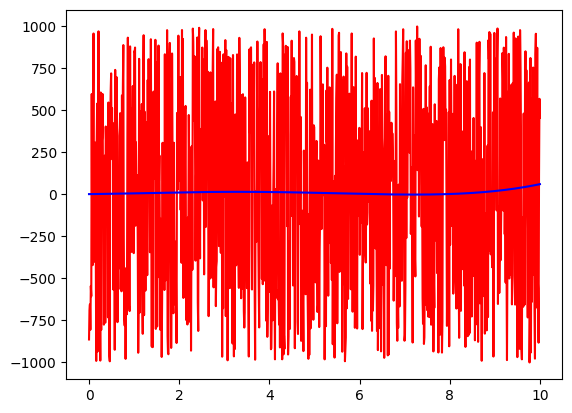

In [3]:
start = 0
end = 10
steps = 1000

test_x, test_y = example.generate_test(lambda x: example.random_function(1000)(x), start, end, steps)
x0 = np.array([1., 1., 1., 1., 1.])
func, jac = funcs["pol"]
test = optimize(func, jac, reg.regression, reg.grad, method='L_BFGS')

betta, info = test(test_x, test_y, x0, 1, 5, 1e-4, 1000)

X = np.linspace(start, end, steps)
Y = func(X)(betta)

example.show(test_x, test_y, X, Y)

In [4]:
betta

array([ 1.18543788,  3.089582  ,  2.6915141 , -0.95407193,  0.07132821])

Filename: C:\Workspace\study\sem-4\metopts-labs\lab_3\solution\optimize\lbfgs.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     9 132.8203 MiB 132.8203 MiB           1   @profile(precision=4)
    10                                         def lbfgs(func, grad, generations, start, t=0.5, eps=1e-4, max_iter=100):
    11 132.8203 MiB   0.0000 MiB           1       trace = [start]
    12                                         
    13 132.8203 MiB   0.0000 MiB           1       iters = 0
    14 132.8203 MiB   0.0000 MiB           1       actions = 0
    15                                         
    16 132.8203 MiB   0.0000 MiB           1       start_time = time.time()
    17                                         
    18 132.8203 MiB   0.0000 MiB           1       dim = len(start)
    19 132.8203 MiB   0.0000 MiB           1       point = start
    20 132.8242 MiB   0.0039 MiB           1       old_g = grad(point)
    21 132.8281 MiB   0.0039 MiB           1       

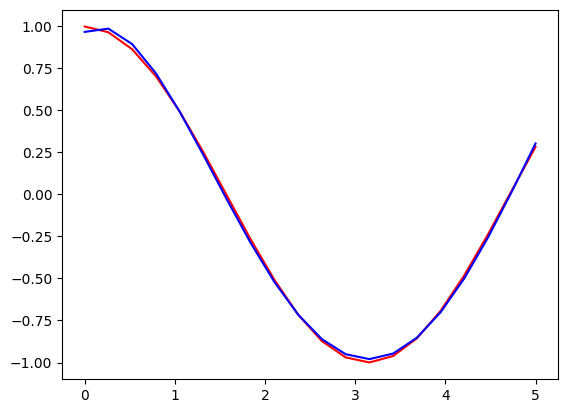

In [5]:
import tests as tests

input = tests.create_tests()

interest = 21
iter = 0
for test in input:
    if iter != interest:
        iter += 1
        continue
    
    func, jac = test.model
    task = optimize(func, jac, reg.regression, reg.grad, method='L_BFGS')
    
    betta, info = task(test.X, test.Y, test.init_point, 0.1, 1000, 1e-4, 10000)
    
    X = np.linspace(test.begin, test.end, test.steps)
    Y = func(X)(betta)
    
    example.show(test.X, test.Y, X, Y)
    
    iter += 1